In [111]:
# Initial Imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import math 
# Importing time package
import time


#matplotlib style options
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 4)

# Initialization 

In [112]:
df_corona = pd.read_csv('./Data/covid_19_clean_complete.csv')

In [113]:
df_corona['Date'] = pd.to_datetime(df_corona['Date'])

# Summery Plots

In [114]:
Time_stats = df_corona[["Confirmed","Deaths","Recovered","Date"]].groupby(["Date"]).sum()

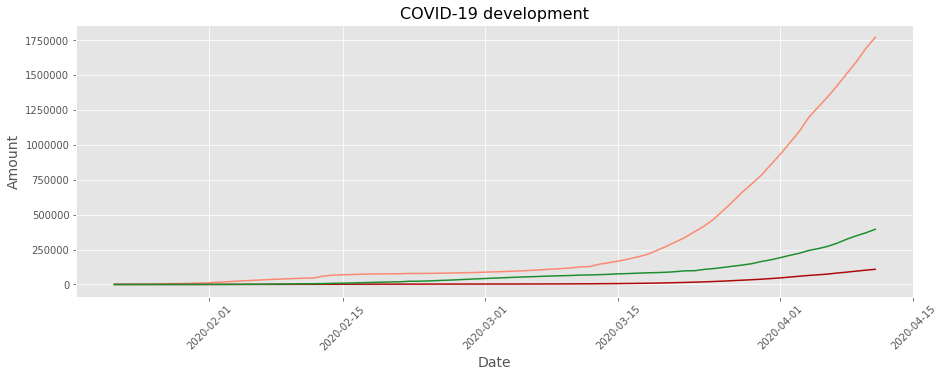

In [115]:
# Plot of COVID-19 Development
plt.figure(figsize=[15,5])
plt.title("COVID-19 development",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)
plt.plot(Time_stats.index,Time_stats['Confirmed'],c="#FC8970")
plt.plot(Time_stats.index,Time_stats['Deaths'],c='#AF0808')
plt.plot(Time_stats.index,Time_stats['Recovered'],c='#1D8E30')
plt.xticks(rotation=45)
plt.show()

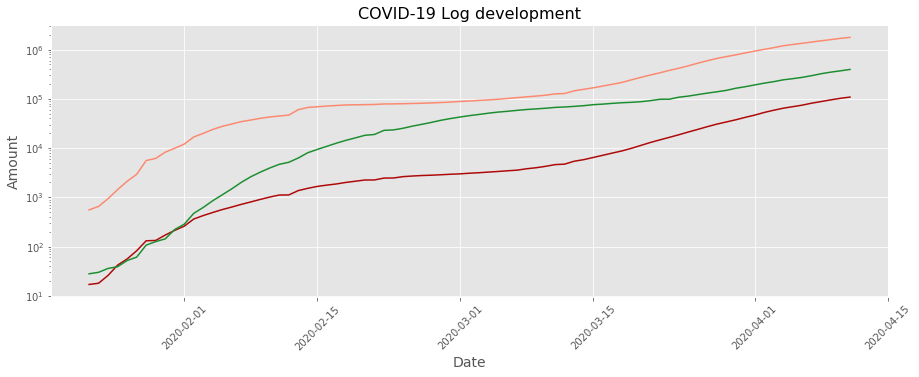

In [116]:
# Clearly exponential growth - log transformation of y axis. 
plt.figure(figsize=[15,5])
plt.title("COVID-19 Log development",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)
plt.plot(Time_stats.index,Time_stats['Confirmed'],c="#FC8970")
plt.plot(Time_stats.index,Time_stats['Deaths'],c='#AF0808')
plt.plot(Time_stats.index,Time_stats['Recovered'],c='#1D8E30')
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()

We see that #death follow #confirmed, thereby a pretty stable mortatility rate

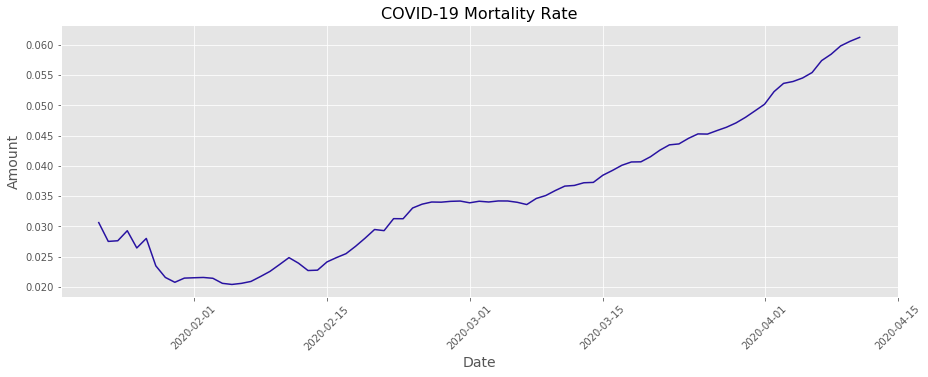

In [117]:
# Clearly exponential growth - log transformation of y axis. 
plt.figure(figsize=[15,5])
plt.title("COVID-19 Mortality Rate",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)
plt.plot(Time_stats.index,(Time_stats['Deaths']/Time_stats['Confirmed']),c="#2812A1")
plt.xticks(rotation=45)
plt.show()

Mortality rate has increased from about 3 % in march to 6 % in april ! WHY ? , less testing? collaps of healthcare?

Country wise look:

In [401]:
Country_Time_stats = df_corona[["Confirmed","Deaths","Recovered","Date","Country/Region"]].groupby(["Country/Region","Date"]).sum()
Country_Time_stats['Country'] = Country_Time_stats.index.get_level_values(0)
Country_Time_stats['Date'] = Country_Time_stats.index.get_level_values(1)

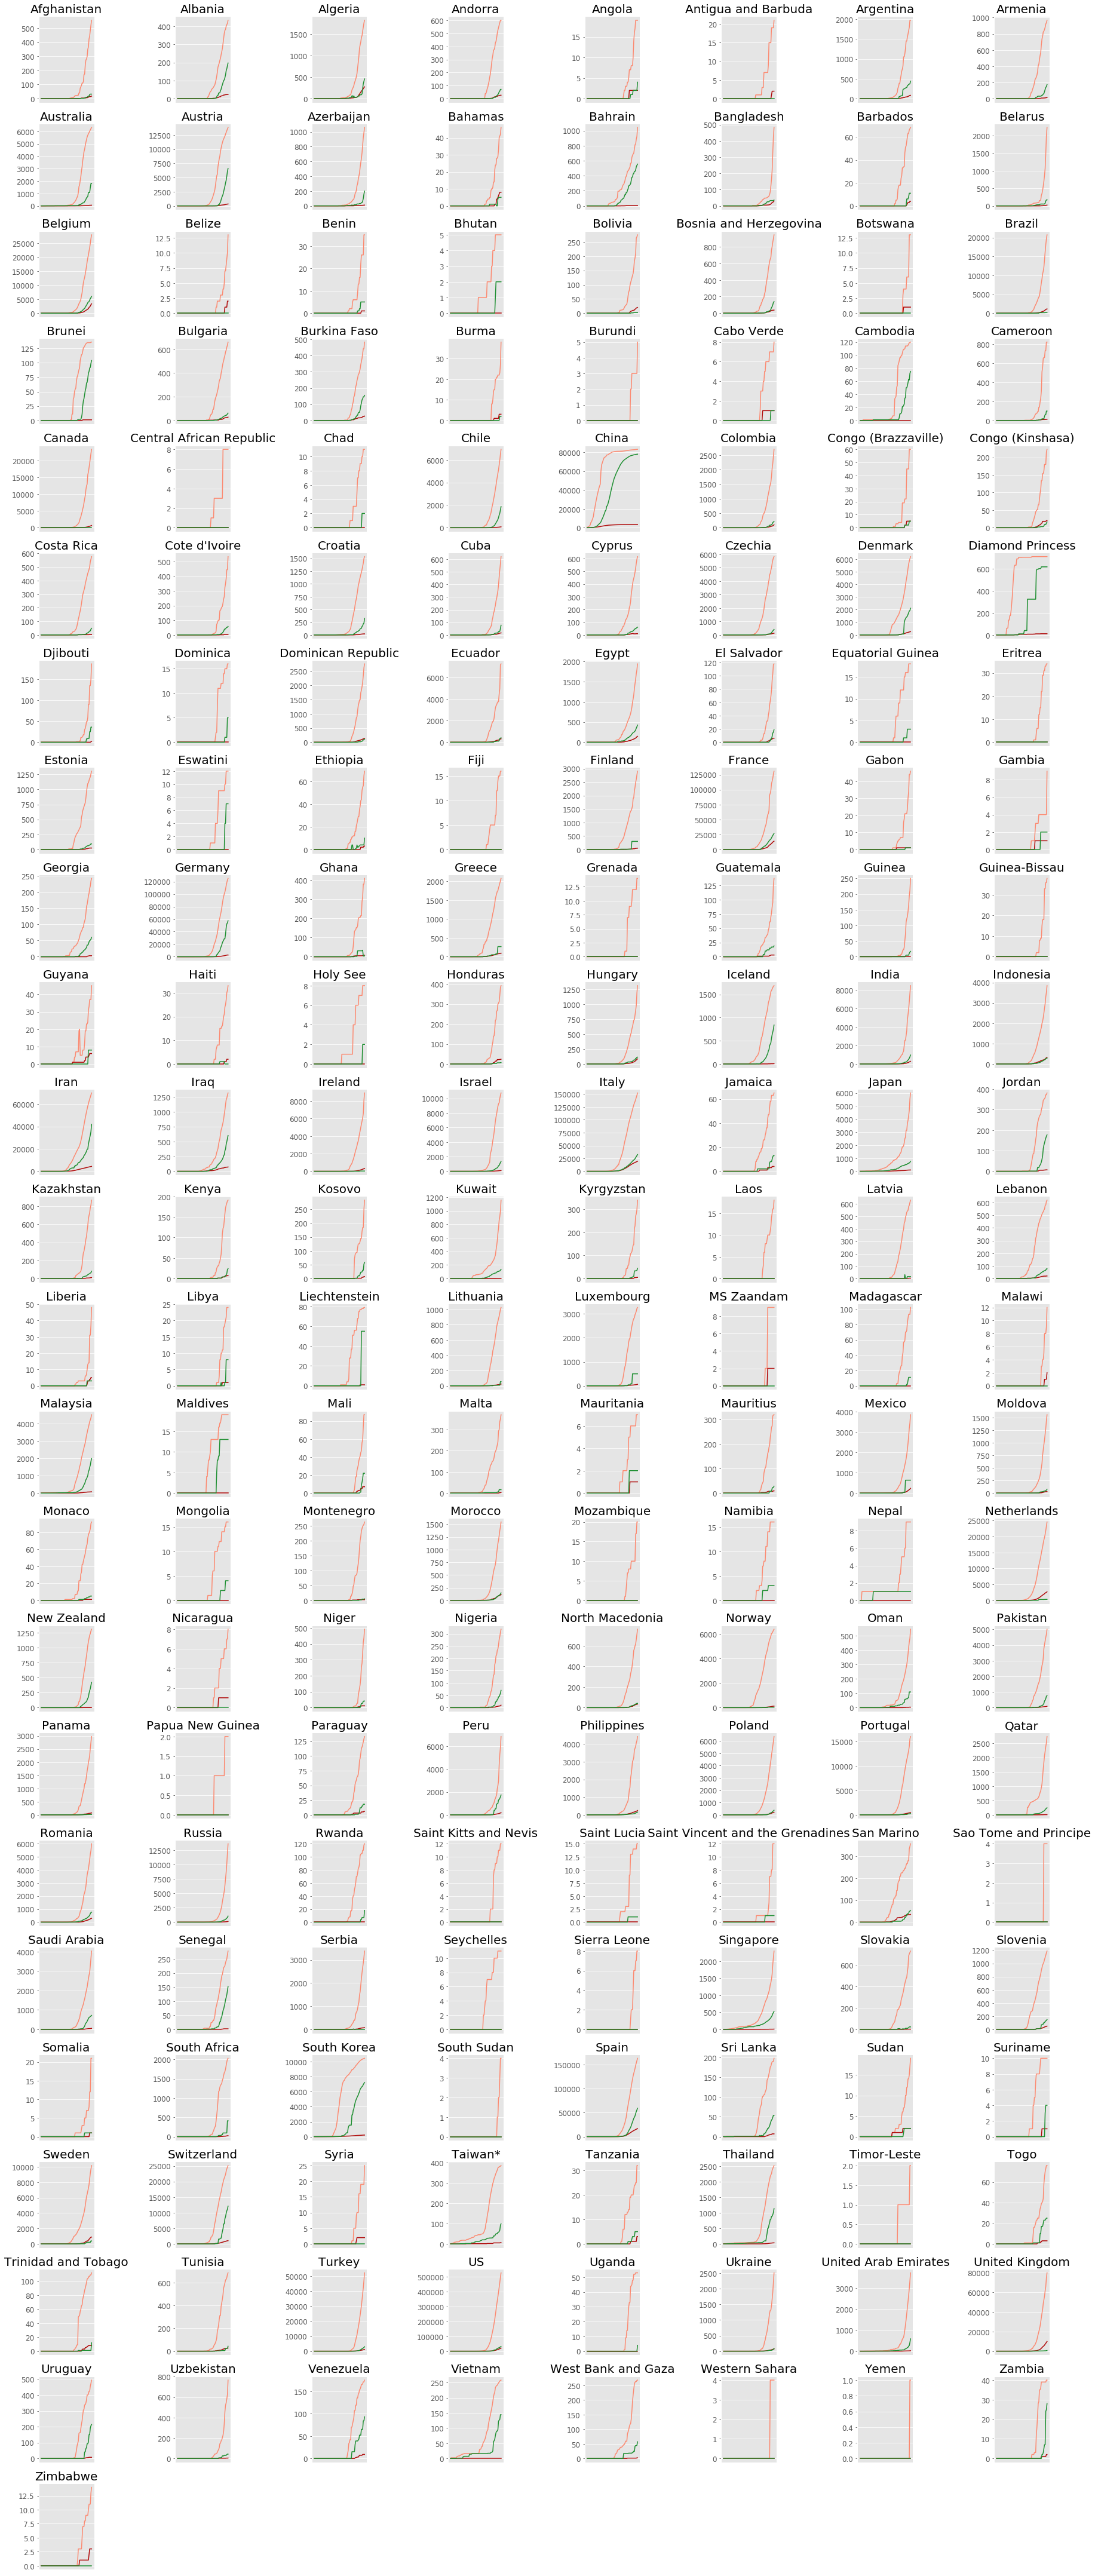

In [402]:
# Plotting COVID development for all countries. 
plt.figure(figsize=(25,60))
for i, elem in enumerate(Country_Time_stats['Country'].unique()):
    plt.subplot(24,8,i+1)
    plt.title(elem, fontsize = 20)
    temp_df = Country_Time_stats[Country_Time_stats.Country.isin([elem])]
    
    plt.plot(temp_df['Date'],temp_df['Confirmed'],c="#FC8970")
    plt.plot(temp_df['Date'],temp_df['Deaths'],c='#AF0808')
    plt.plot(temp_df['Date'],temp_df['Recovered'],c='#1D8E30')
    
    plt.yticks(fontsize = 12)
    #plt.xticks(fontsize = 20, rotation = 45)
    plt.xticks([])
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [403]:
# Looking at mortatility rate per country. 
Country_stats = df_corona[["Confirmed","Deaths","Recovered","Country/Region"]].groupby(["Country/Region"]).max()
# filtering out all countries with less than 500 cases to remove high data uncertaintency
Country_stats2 = Country_stats[Country_stats["Confirmed"]>=500]
len(Country_stats2.index.unique())

87

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



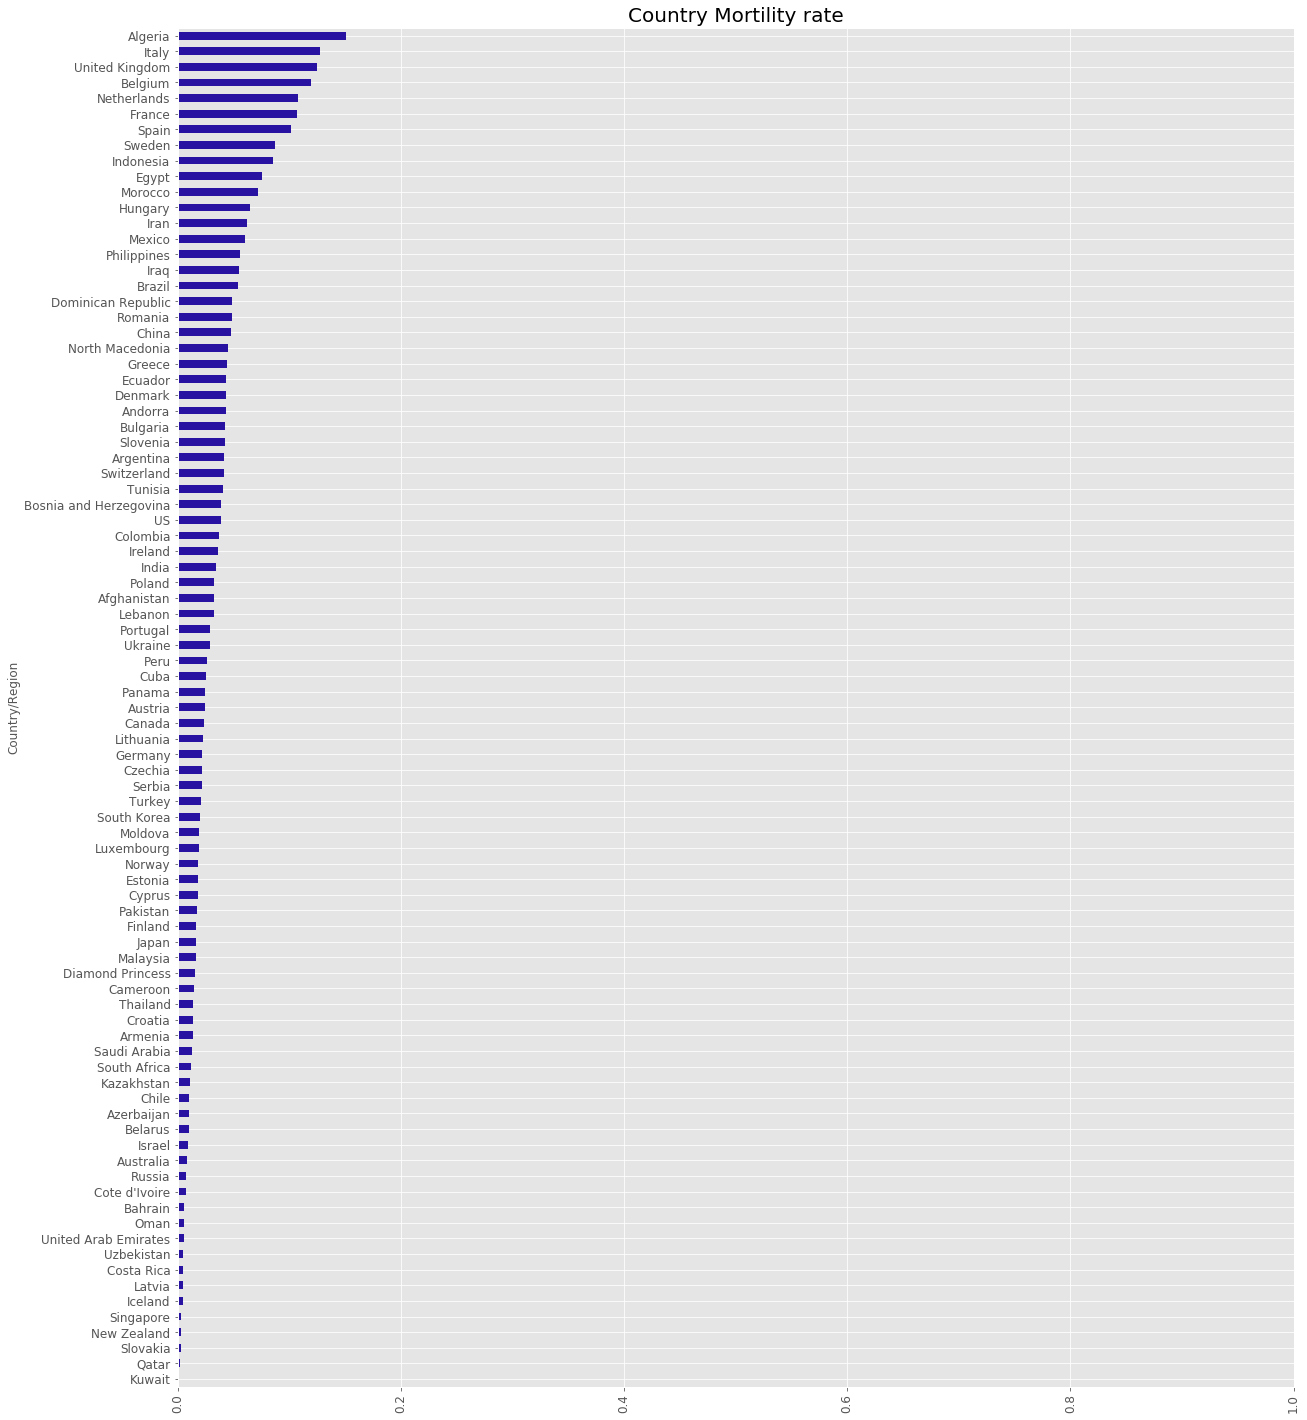

In [404]:
# Looking at mortatility rate per country. 
Country_stats = df_corona[["Confirmed","Deaths","Recovered","Country/Region"]].groupby(["Country/Region"]).max()
# filtering out all countries with less than 500 cases to remove high data uncertaintency
Country_stats2 = Country_stats[Country_stats["Confirmed"]>=500]
# Adding mortality rate to dataframe
Country_stats2['Mortalityrate'] = Country_stats2['Deaths']/Country_stats2['Confirmed']
# Sorting 
Country_stats2 = Country_stats2.sort_values(by=['Mortalityrate'], ascending=False)

#plotting the mortality rate per country wtih more than 499 confirmed cases.
plt.figure(figsize=[20,25])

plt.title('Country Mortility rate', fontsize = 20)
Country_stats2['Mortalityrate'].sort_values(ascending=True).plot(kind="barh",color="#2812A1") 
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 90)
plt.xlim([0,1])
#plt.xlabel('')
plt.show()

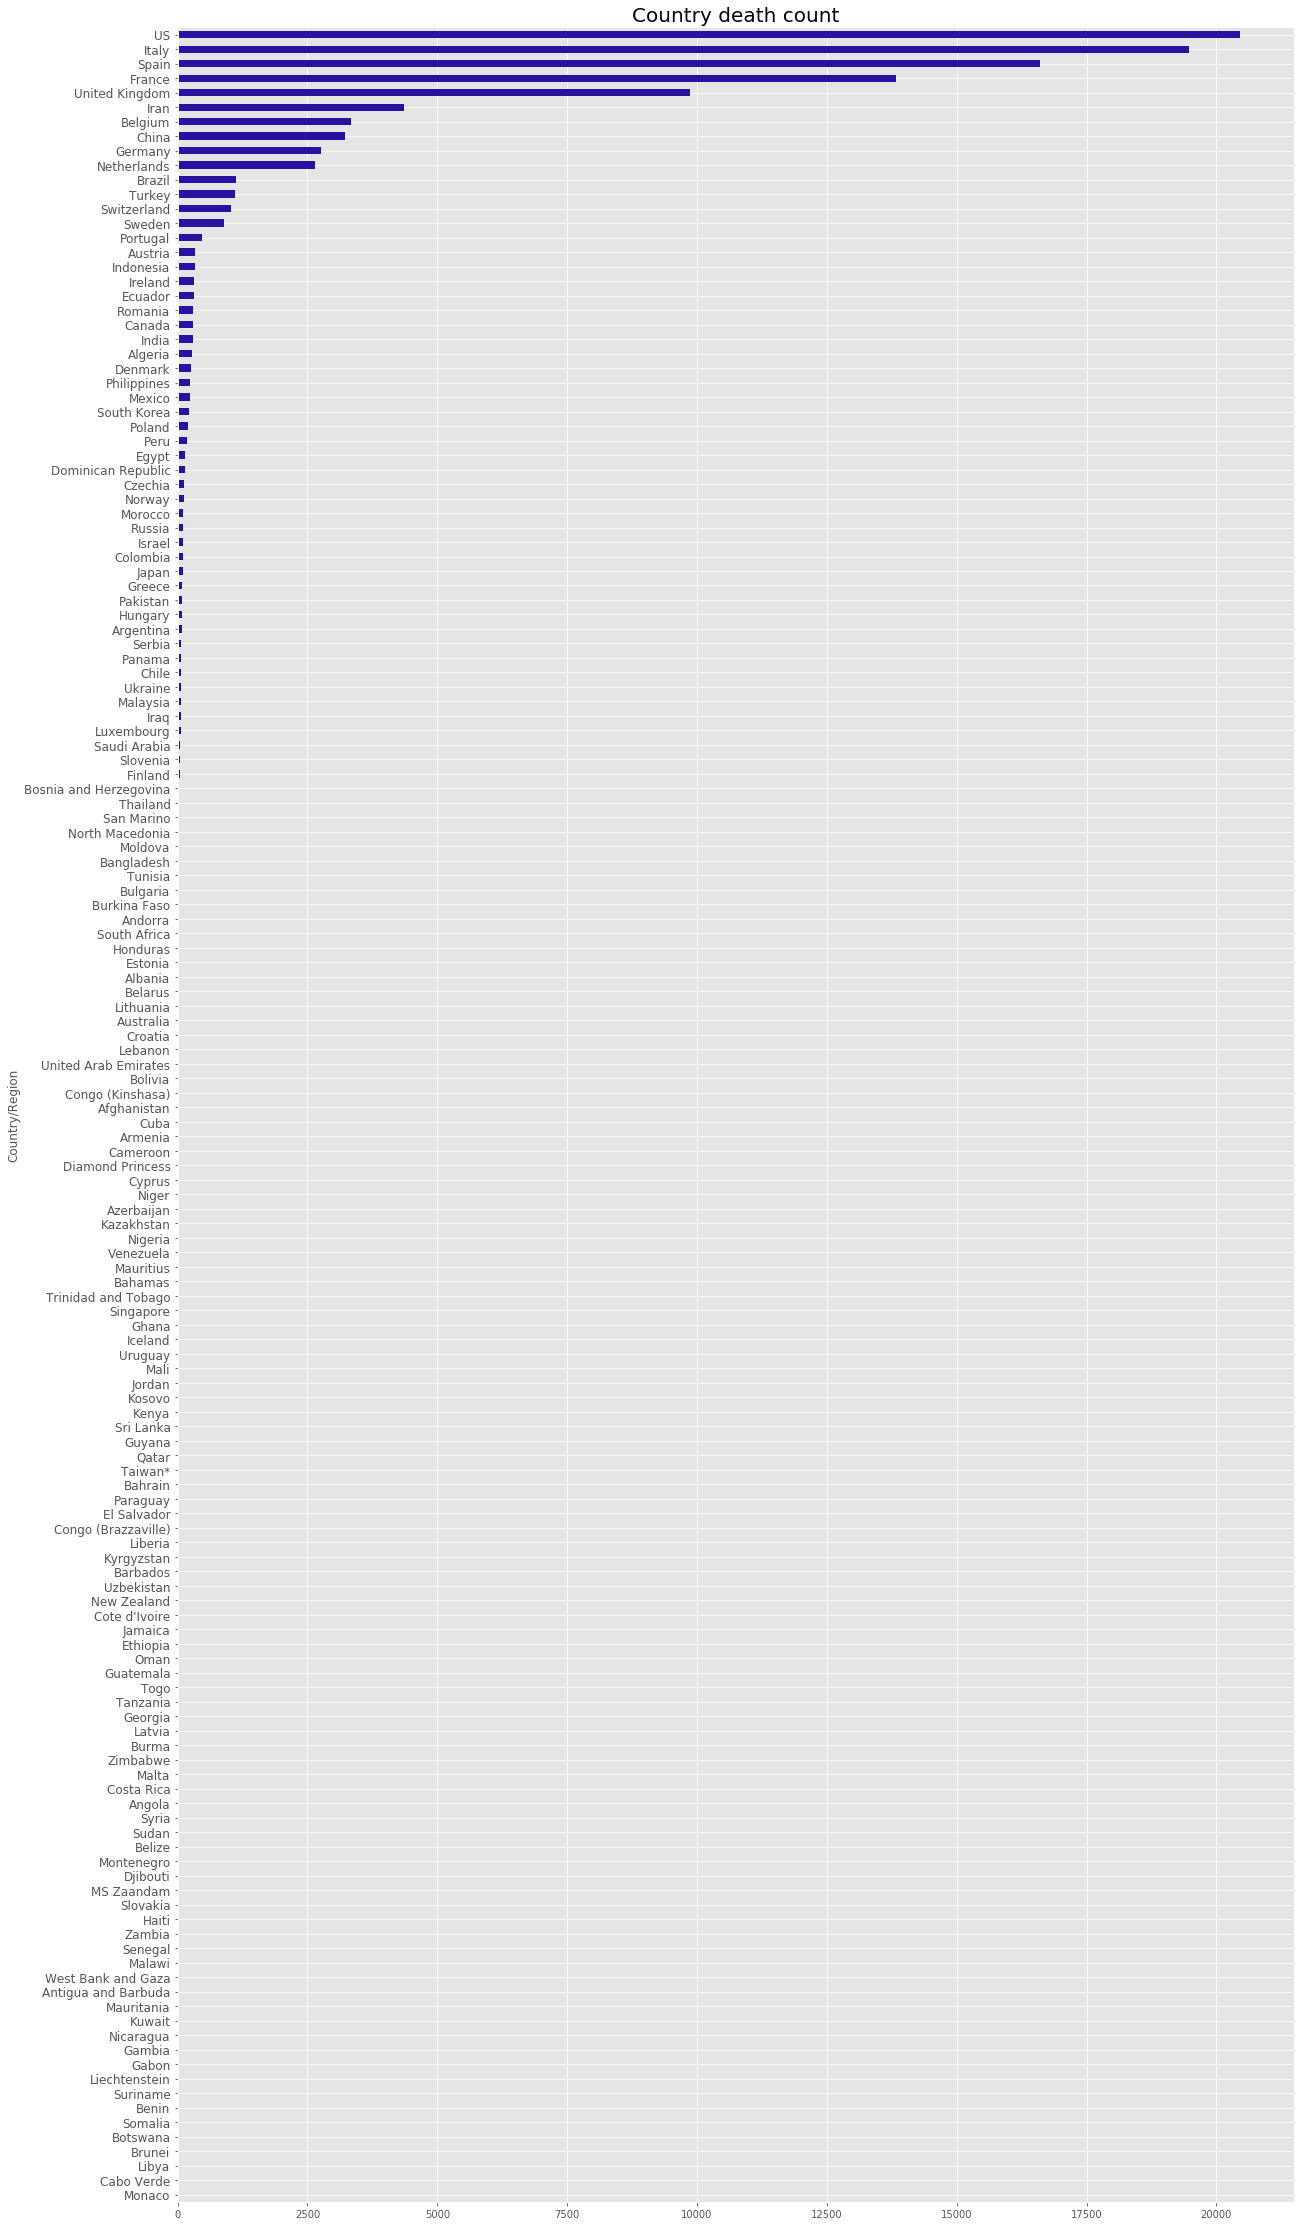

In [405]:
# Death count per country
plt.figure(figsize=[20,40])
plt.title('Country death count', fontsize = 20)
temp = Country_stats[Country_stats['Deaths']>0]
temp['Deaths'].sort_values(ascending=True).plot(kind="barh",color="#2812A1") 
plt.yticks(fontsize = 12)
plt.show()

In [406]:
# Dead count per citizens in country - Mangler beboer i landene

# Country wise death over time - Bokeh

In [634]:
# Focusing on top 24 countries by death rate. 
temp = Country_stats[Country_stats['Deaths']>250]
print(temp['Deaths'].sort_values(ascending=False).index)
FocusCountries = ['US', 'Italy', 'Spain', 'France', 'United Kingdom', 'Iran', 'Belgium',
       'China', 'Germany', 'Netherlands', 'Brazil', 'Turkey', 'Switzerland',
       'Sweden', 'Portugal', 'Austria', 'Indonesia', 'Ireland', 'Ecuador',
       'Romania', 'Canada', 'India', 'Algeria', 'Denmark']
#FocusCountries = ['US', 'Italy', 'Spain', 'France', 'United Kingdom']

Index(['US', 'Italy', 'Spain', 'France', 'United Kingdom', 'Iran', 'Belgium',
       'China', 'Germany', 'Netherlands', 'Brazil', 'Turkey', 'Switzerland',
       'Sweden', 'Portugal', 'Austria', 'Indonesia', 'Ireland', 'Ecuador',
       'Romania', 'Canada', 'India', 'Algeria', 'Denmark'],
      dtype='object', name='Country/Region')


In [635]:
#preparing for bohek chart of death distribution per focus country
Focus_Country_Time_stats = Country_Time_stats[Country_Time_stats['Country'].isin(FocusCountries)]
Bohek1 = Focus_Country_Time_stats['Deaths'].unstack().T
# Reseting index
Bohek1 = Bohek1.reset_index()
# Filtering
Bohek1 = pd.DataFrame(data=Bohek1)
# Printing
del Bohek1['Date']
# Reseting index
Bohek1 = Bohek1.reset_index()
Bohek1

AttributeError: 'Int64Index' object has no attribute 'remove_unused_levels'

In [409]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.palettes import viridis
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Legend
from bokeh.models.tools import HoverTool

In [410]:
output_notebook()

Loading BokehJS ...

In [411]:
source = ColumnDataSource(Bohek1)

In [412]:
date = source.data['index'].tolist()
date = [ str(x) for x in date ]

In [413]:
TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Deaths", "@$name"),
]

p = figure(x_range = FactorRange(factors=date), plot_height=500, plot_width = 1000, title="Country wise timeline of COVID-19 casualties",
           x_axis_label = 'Days since first death in world',y_axis_label = 'Death toll',toolbar_location=None,tooltips=TOOLTIPS)

In [414]:
line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors

# Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))

In [415]:
legend1 = Legend(items=items[0:12],click_policy='mute')
legend2 = Legend(items=items[12:24],click_policy='mute')
p.add_layout(legend1,'left')
p.add_layout(legend2,'left')

p.xaxis.major_label_orientation =3.1415/2
show(p)

In [416]:
# Making double loop to count days since outbreak got to 1 confirmed people in country
#empty string
day_count = []
#outer counter
indx2 = 0
#loop over focus countries
for i in Focus_Country_Time_stats['Country'].unique():
    #inner counter
    indx1 = 1
    #loop over dates
    for d in range(0,len(Focus_Country_Time_stats['Date'].unique())):
        #if statement to only count when confirmed people hits 5 
        if Focus_Country_Time_stats.iloc[d+indx2,1] < 1: 
            day_count.append(0)
        else:
            day_count.append(indx1)
            indx1=indx1+1
            
    indx2=indx2+len(Focus_Country_Time_stats['Date'].unique())

# Adding the Dataframe
Focus_Country_Time_stats['DaysSinceOutbreak'] = day_count



/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [417]:
#Grouping by days since outbreak
Bohek2 = Focus_Country_Time_stats[["Deaths","DaysSinceOutbreak",'Country']].groupby(['Country',"DaysSinceOutbreak"]).sum()
Bohek2 = Bohek2.unstack().T
# Reseting index
Bohek2 = Bohek2.reset_index()
# Filtering
Bohek2 = pd.DataFrame(data=Bohek2)
# Printing
del Bohek2['DaysSinceOutbreak']
del Bohek2['level_0']
# Reseting index
Bohek2 = Bohek2.reset_index()
Bohek2

Country  index  Algeria  Austria  Belgium  Brazil  Canada   China  Denmark  \
0            0      0.0      0.0      0.0     0.0     0.0     NaN      0.0   
1            1      1.0      1.0      3.0     1.0     1.0    17.0      1.0   
2            2      2.0      1.0      3.0     3.0     1.0    18.0      2.0   
3            3      3.0      1.0      3.0     6.0     1.0    26.0      3.0   
4            4      4.0      1.0      4.0    11.0     1.0    42.0      4.0   
5            5      4.0      3.0      4.0    15.0     1.0    56.0      4.0   
6            6      4.0      3.0      5.0    25.0     1.0    82.0      6.0   
7            7      7.0      4.0     10.0    34.0     1.0   131.0      9.0   
8            8      9.0      6.0     14.0    46.0     4.0   133.0     13.0   
9            9     11.0      6.0     21.0    59.0     5.0   171.0     13.0   
10          10     15.0      8.0     37.0    77.0     8.0   213.0     24.0   
11          11     17.0     16.0     67.0    92.0     9.0   259.0     32.0   
12          12     17.0     21.0     75.0   111.0    12.0   361.0     34.0   
13          13     19.0     28.0     88.0   136.0    19.0   425.0     41.0   
14          14     21.0     30.0    122.0   159.0    21.0   491.0     52.0   
15          15     25.0     49.0    178.0   201.0    25.0   563.0     65.0   
16          16     26.0     58.0    220.0   240.0    26.0   633.0     72.0   
17          17     29.0     68.0    289.0   324.0    30.0   718.0     77.0   
18          18     31.0     86.0    353.0   359.0    38.0   805.0     90.0   
19          19     35.0    108.0    431.0   445.0    54.0   905.0    104.0   
20          20     44.0    128.0    513.0   486.0    61.0  1012.0    123.0   
21          21     58.0    146.0    705.0   564.0    64.0  1112.0    139.0   
22          22     86.0    158.0    828.0   686.0    80.0  1117.0    161.0   
23          23    105.0    168.0   1011.0   819.0   101.0  1369.0    179.0   
24          24    130.0    186.0   1143.0   950.0   109.0  1521.0    187.0   
25          25    152.0    204.0   1283.0  1057.0   139.0  1663.0    203.0   
26          26    173.0    220.0   1447.0  1124.0   179.0  1766.0    218.0   
27          27    193.0    243.0   1632.0     NaN   218.0  1864.0    237.0   
28          28    205.0    273.0   2035.0     NaN   259.0  2003.0    247.0   
29          29    235.0    295.0   2240.0     NaN   339.0  2116.0    260.0   
30          30    256.0    319.0   2523.0     NaN   375.0  2238.0      NaN   
31          31    275.0    337.0   3019.0     NaN   407.0  2238.0      NaN   
32          32      NaN      NaN   3346.0     NaN   503.0  2443.0      NaN   
33          33      NaN      NaN      NaN     NaN   557.0  2445.0      NaN   
34          34      NaN      NaN      NaN     NaN   654.0  2595.0      NaN   
35          35      NaN      NaN      NaN     NaN     NaN  2665.0      NaN   
36          36      NaN      NaN      NaN     NaN     NaN  2717.0      NaN   
37          37      NaN      NaN      NaN     NaN     NaN  2746.0      NaN   
38          38      NaN      NaN      NaN     NaN     NaN  2790.0      NaN   
39          39      NaN      NaN      NaN     NaN     NaN  2837.0      NaN   
40          40      NaN      NaN      NaN     NaN     NaN  2872.0      NaN   
41          41      NaN      NaN      NaN     NaN     NaN  2914.0      NaN   
42          42      NaN      NaN      NaN     NaN     NaN  2947.0      NaN   
43          43      NaN      NaN      NaN     NaN     NaN  2983.0      NaN   
44          44      NaN      NaN      NaN     NaN     NaN  3015.0      NaN   
45          45      NaN      NaN      NaN     NaN     NaN  3044.0      NaN   
46          46      NaN      NaN      NaN     NaN     NaN  3072.0      NaN   
47          47      NaN      NaN      NaN     NaN     NaN  3100.0      NaN   
48          48      NaN      NaN      NaN     NaN     NaN  3123.0      NaN   
49          49      NaN      NaN      NaN     NaN     NaN  3139.0      NaN   
50          50      Na

In [418]:
source2 = ColumnDataSource(Bohek2)

In [419]:
days = source2.data['index'].tolist()
days = [ str(x) for x in days ]

In [420]:
TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Deaths", "@$name"),
]
p = figure(x_range = FactorRange(factors=days), plot_height=500, plot_width = 1000, title="Logarithmic Country wise timeline of COVID-19 casualties",
           x_axis_label = 'Days since first death in country',y_axis_label = 'Death toll',toolbar_location=None,y_axis_type="log",tooltips=TOOLTIPS)


In [421]:
line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors


#Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source2,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))


In [422]:
legend1 = Legend(items=items[0:12],click_policy='mute')
legend2 = Legend(items=items[12:24],click_policy='mute')
p.add_layout(legend1,'left')
p.add_layout(legend2,'left')


p.xaxis.major_label_orientation =3.1415/2
show(p)

Growth rate

Country_Time_stats is important dataframe that will be used later for ANN

In [423]:
# Making double loop to count days since outbreak got to 1 confirmed people in country
#empty string
day_count = []
#outer counter
indx2 = 0
#loop over focus countries
for i in Country_Time_stats['Country'].unique():
    #inner counter
    indx1 = 1
    #loop over dates
    for d in range(0,len(Country_Time_stats['Date'].unique())):
        #if statement to only count when confirmed people hits 5 
        if Country_Time_stats.iloc[d+indx2,1] < 1: 
            day_count.append(0)
        else:
            day_count.append(indx1)
            indx1=indx1+1
            
    indx2=indx2+len(Country_Time_stats['Date'].unique())

# Adding the Dataframe
Country_Time_stats['DaysSinceOutbreak'] = day_count


# Making double loop to calculate growthrate per day for each country
#empty string
growth_rate = []
#outer counter
indx2 = 0
#loop over focus countries
for i in Country_Time_stats['Country'].unique():
    #inner counter
    indx1 = 1
    #loop over dates
    for d in range(0,len(Country_Time_stats['Date'].unique())):
        #if statement to correct my noob indexing issue of substrating the last death count of country 1 with first death count of country 2 ect.
        if Country_Time_stats.iloc[d+indx2,1]-Country_Time_stats.iloc[d-1+indx2,1] > 0:
            growth_rate.append((Country_Time_stats.iloc[d+indx2,1]-Country_Time_stats.iloc[d-1+indx2,1])/Country_Time_stats.iloc[d-1+indx2,1])
        else:
            growth_rate.append(0)    
            
    indx2=indx2+len(Country_Time_stats['Date'].unique())

# Adding the Dataframe
Country_Time_stats['GrowthRate'] = growth_rate

Country_Time_stats = Country_Time_stats[Country_Time_stats['DaysSinceOutbreak'] != 0]
Country_Time_stats = Country_Time_stats[Country_Time_stats['DaysSinceOutbreak'] != 1]
Country_Time_stats.head()

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning:

divide by zero encountered in long_scalars



Confirmed  Deaths  Recovered      Country  \
Country/Region Date                                                    
Afghanistan    2020-03-23         40       1          1  Afghanistan   
               2020-03-24         74       1          1  Afghanistan   
               2020-03-25         84       2          2  Afghanistan   
               2020-03-26         94       4          2  Afghanistan   
               2020-03-27        110       4          2  Afghanistan   

                                Date  DaysSinceOutbreak  GrowthRate  
Country/Region Date                                                  
Afghanistan    2020-03-23 2020-03-23                  2         0.0  
               2020-03-24 2020-03-24                  3         0.0  
               2020-03-25 2020-03-25                  4         1.0  
               2020-03-26 2020-03-26                  5         1.0  
               2020-03-27 2020-03-27                  6         0.0

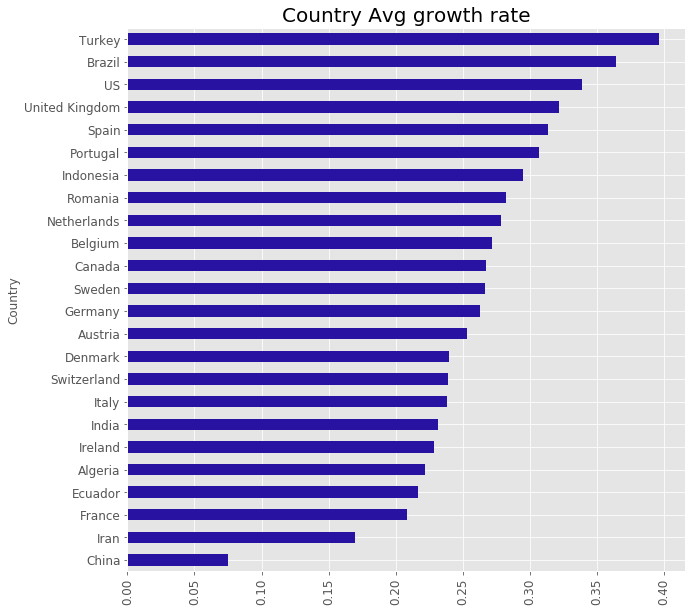

In [424]:
# Grouping mean growth rate pr country.
Country_growth_rate = Country_Time_stats[["GrowthRate","Country"]].groupby(["Country"]).mean()
# filter to only look at focus countries
Country_growth_rate = Country_growth_rate[Country_growth_rate.index.isin(FocusCountries)]
# Plotting the growth rate per FOCUS country.
plt.figure(figsize=[10,10])

plt.title('Country Avg growth rate', fontsize = 20)
Country_growth_rate.GrowthRate.sort_values(ascending=True).plot(kind="barh",color="#2812A1") 
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 90)
plt.show()

In [425]:
# Making double loop to calculate growthrate per day for each country
#empty string
growth_rate = []
#outer counter
indx2 = 0
#loop over focus countries
for i in Focus_Country_Time_stats['Country'].unique():
    #inner counter
    indx1 = 1
    #loop over dates
    for d in range(0,len(Focus_Country_Time_stats['Date'].unique())):
        #if statement to correct my noob indexing issue of substrating the last death count of country 1 with first death count of country 2 ect.
        if Focus_Country_Time_stats.iloc[d+indx2,1]-Focus_Country_Time_stats.iloc[d-1+indx2,1] > 0:
            growth_rate.append((Focus_Country_Time_stats.iloc[d+indx2,1]-Focus_Country_Time_stats.iloc[d-1+indx2,1])/Focus_Country_Time_stats.iloc[d-1+indx2,1])
        else:
            growth_rate.append(0)    
            
    indx2=indx2+len(Focus_Country_Time_stats['Date'].unique())

# Adding the Dataframe
Focus_Country_Time_stats['GrowthRate'] = growth_rate

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in long_scalars



In [426]:
#Grouping by days since outbreak
Bohek3 = Focus_Country_Time_stats[["GrowthRate","DaysSinceOutbreak",'Country']].groupby(['Country',"DaysSinceOutbreak"]).sum()
Bohek3 = Bohek3.unstack().T
# Reseting index
Bohek3 = Bohek3.reset_index()
# Filtering
Bohek3 = pd.DataFrame(data=Bohek3)
# Printing
del Bohek3['DaysSinceOutbreak']
del Bohek3['level_0']
# Reseting index
Bohek3 = Bohek3.reset_index()
Bohek3 = Bohek3.drop([0, 1])
Bohek3

Country  index   Algeria   Austria   Belgium    Brazil    Canada     China  \
2            2  1.000000  0.000000  0.000000  2.000000  0.000000  0.058824   
3            3  0.500000  0.000000  0.000000  1.000000  0.000000  0.444444   
4            4  0.333333  0.000000  0.333333  0.833333  0.000000  0.615385   
5            5  0.000000  2.000000  0.000000  0.363636  0.000000  0.333333   
6            6  0.000000  0.000000  0.250000  0.666667  0.000000  0.464286   
7            7  0.750000  0.333333  1.000000  0.360000  0.000000  0.597561   
8            8  0.285714  0.500000  0.400000  0.352941  3.000000  0.015267   
9            9  0.222222  0.000000  0.500000  0.282609  0.250000  0.285714   
10          10  0.363636  0.333333  0.761905  0.305085  0.600000  0.245614   
11          11  0.133333  1.000000  0.810811  0.194805  0.125000  0.215962   
12          12  0.000000  0.312500  0.119403  0.206522  0.333333  0.393822   
13          13  0.117647  0.333333  0.173333  0.225225  0.583333  0.177285   
14          14  0.105263  0.071429  0.386364  0.169118  0.105263  0.155294   
15          15  0.190476  0.633333  0.459016  0.264151  0.190476  0.146640   
16          16  0.040000  0.183673  0.235955  0.194030  0.040000  0.124334   
17          17  0.115385  0.172414  0.313636  0.350000  0.153846  0.134281   
18          18  0.068966  0.264706  0.221453  0.108025  0.266667  0.121170   
19          19  0.129032  0.255814  0.220963  0.239554  0.421053  0.124224   
20          20  0.257143  0.185185  0.190255  0.092135  0.129630  0.118232   
21          21  0.318182  0.140625  0.374269  0.160494  0.049180  0.098814   
22          22  0.482759  0.082192  0.174468  0.216312  0.250000  0.004496   
23          23  0.220930  0.063291  0.221014  0.193878  0.262500  0.225604   
24          24  0.238095  0.107143  0.130564  0.159951  0.079208  0.111030   
25          25  0.169231  0.096774  0.122485  0.112632  0.275229  0.093360   
26          26  0.138158  0.078431  0.127825  0.063387  0.287770  0.061936   
27          27  0.115607  0.104545  0.127851       NaN  0.217877  0.055493   
28          28  0.062176  0.123457  0.246936       NaN  0.188073  0.074571   
29          29  0.146341  0.080586  0.100737       NaN  0.308880  0.056415   
30          30  0.089362  0.081356  0.126339       NaN  0.106195  0.057656   
31          31  0.074219  0.056426  0.196591       NaN  0.085333  0.000000   
32          32       NaN       NaN  0.108314       NaN  0.235872  0.091600   
33          33       NaN       NaN       NaN       NaN  0.107356  0.000819   
34          34       NaN       NaN       NaN       NaN  0.174147  0.061350   
35          35       NaN       NaN       NaN       NaN       NaN  0.026975   
36          36       NaN       NaN       NaN       NaN       NaN  0.019512   
37          37       NaN       NaN       NaN       NaN       NaN  0.010674   
38          38       NaN       NaN       NaN       NaN       NaN  0.016023   
39          39       NaN       NaN       NaN       NaN       NaN  0.016846   
40          40       NaN       NaN       NaN       NaN       NaN  0.012337   
41          41       NaN       NaN       NaN       NaN       NaN  0.014624   
42          42       NaN       NaN       NaN       NaN       NaN  0.011325   
43          43       NaN       NaN       NaN       NaN       NaN  0.012216   
44          44       NaN       NaN       NaN       NaN       NaN  0.010727   
45          45       NaN       NaN       NaN       NaN       NaN  0.009619   
46          46       NaN       NaN       NaN       NaN       NaN  0.009198   
47          47       NaN       NaN       NaN       NaN       NaN  0.009115   
48          48       NaN       NaN       NaN       NaN       NaN  0.007419   
49          49       NaN       NaN       NaN       NaN       NaN  0.005123   
50          50       NaN       NaN       NaN       NaN       NaN  0.007009   
51          51       NaN       NaN       NaN       NaN       NaN  0.003480   
52          52       N

In [427]:
source3 = ColumnDataSource(Bohek3)

days = source3.data['index'].tolist()
days = [ str(x) for x in days ]

TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Growth rate", "@$name"),
]
p = figure(x_range = FactorRange(factors=days), plot_height=500, plot_width = 1000, title="Country wise timeline of COVID-19 growth rate",
           x_axis_label = 'Days since first death in world',y_axis_label = 'Growth rate',toolbar_location=None,tooltips=TOOLTIPS)


line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors


#Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source3,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))

    
legend1 = Legend(items=items[0:12],click_policy='mute')
legend2 = Legend(items=items[12:24],click_policy='mute')
p.add_layout(legend1,'left')
p.add_layout(legend2,'left')


p.xaxis.major_label_orientation =3.1415/2
show(p)

We see that the growth rate become smaller and smaller - together with information from death distribution in china seen in bokeh plot 1 it looks to follow a sigmoid distribution more and exponential distribution. 

# Forecasting

# Heatmaps

In [428]:
#Grouping by date and country to get comfirmed & deaths for the whole country inclusive regions
Date_Country_stats = df_corona[["Confirmed","Deaths","Recovered","Date","Country/Region"]].groupby(["Date","Country/Region"]).sum()
Date_Country_stats['Mortalityrate'] = Date_Country_stats['Deaths']/Date_Country_stats['Confirmed']
Date_Country_stats['LogDeaths'] = np.log(Date_Country_stats['Deaths']+1)

In [429]:
# Defining newest date
target_date = max(Date_Country_stats.index.get_level_values(0))
# Selecting the newest date only
Newest_Date_Country_stats = Date_Country_stats[Date_Country_stats.index.get_level_values(0) == target_date]

In [430]:
# Plotting death count
import plotly.express as px
fig = px.choropleth(Newest_Date_Country_stats, locations=Newest_Date_Country_stats.index.get_level_values(1), 
                    locationmode='country names', color="LogDeaths", 
                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
                    hover_data=["Confirmed", 'Deaths'],range_color=[0, max(Newest_Date_Country_stats["LogDeaths"])], 
                    color_continuous_scale='reds',
                    title='World map of casaulties')
fig.show()

In [431]:
# Plotting Mortality rate
fig = px.choropleth(Newest_Date_Country_stats, locations=Newest_Date_Country_stats.index.get_level_values(1), 
                    locationmode='country names', color="Mortalityrate", 
                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
                    hover_data=["Confirmed", 'Mortalityrate'],range_color=[0, 0.25], 
                    color_continuous_scale=[[0, 'rgb(245,245,255)'], [1, 'rgb(0,0,255)']],
                    title='World map of Mortality Rate')
fig.show()

# GIF Heatmap

**Uncomment to run**

In [432]:
#import os

#if not os.path.exists("images"):
#    os.mkdir("images")

In [433]:
##install this
##conda install -c plotly plotly-orca==1.2.1 psutil requests
#indx = 1
#for d in Date_Country_stats.index.get_level_values(0).unique(): 
#    
#    temp = Date_Country_stats[Date_Country_stats.index.get_level_values(0) == d]
#    fig = px.choropleth(temp, locations=Newest_Date_Country_stats.index.get_level_values(1), 
#                    locationmode='country names', color="LogDeaths", 
#                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
#                    hover_data=["Confirmed", 'Deaths'],range_color=[0, max(Newest_Date_Country_stats["LogDeaths"])], 
#                   color_continuous_scale='reds',
#                    title='World map of casaulties ' + str(d))
#    fig.write_image(str(indx) + ".png")
#    indx=indx+1

In [434]:
#import imageio
#images = []
#files = os.listdir('./images')
#
#for filename in range(1,len(files)):
#    if filename != '.ipynb_checkpoints':
#        images.append(imageio.imread('./images/' + str(filename)+ '.png'))
#kargs = { 'duration': 0.5 }
#imageio.mimsave('Corona_world_map.gif', images, 'GIF', **kargs )

# ADDING enriched data found on kaggle made by god of geeks 

In [435]:
# Reseting index and changen inf growthrate to 1
Country_Time_stats = Country_Time_stats.reset_index(drop=True)
Country_Time_stats = Country_Time_stats.replace([np.inf, -np.inf], 1)

In [436]:
# Making column with number of deaths happened today.
# Empty string
death_lag0 = []
for i in range(0,len(Country_Time_stats['Country'])):
    if Country_Time_stats.iloc[i,5] == 2:
        death_lag0.append(Country_Time_stats.iloc[i,1])
    else:
        death_lag0.append(Country_Time_stats.iloc[i,1]-Country_Time_stats.iloc[i-1,1]) 
Country_Time_stats['death_lag0'] = death_lag0

In [437]:
#making lags to show the number of deaths for each of the last 4 days
Country_Time_stats['death_lag1'] = Country_Time_stats['death_lag0'].shift(1)
Country_Time_stats['death_lag2'] = Country_Time_stats['death_lag0'].shift(2)
Country_Time_stats['death_lag3'] = Country_Time_stats['death_lag0'].shift(3)
Country_Time_stats['death_lag4'] = Country_Time_stats['death_lag0'].shift(4)

# Correcting overlap between countries when using lags. 
# Correcting lag 1
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag1'] = 0 
# Correcting lag 2
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag2'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 3, 'death_lag2'] = 0 
# Correcting lag 3
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag3'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 3, 'death_lag3'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 4, 'death_lag3'] = 0 
# Correcting lag 4
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 2, 'death_lag4'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 3, 'death_lag4'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 4, 'death_lag4'] = 0 
Country_Time_stats.loc[Country_Time_stats['DaysSinceOutbreak'] == 5, 'death_lag4'] = 0 
Country_Time_stats.head()

Confirmed  Deaths  Recovered      Country       Date  DaysSinceOutbreak  \
0         40       1          1  Afghanistan 2020-03-23                  2   
1         74       1          1  Afghanistan 2020-03-24                  3   
2         84       2          2  Afghanistan 2020-03-25                  4   
3         94       4          2  Afghanistan 2020-03-26                  5   
4        110       4          2  Afghanistan 2020-03-27                  6   

   GrowthRate  death_lag0  death_lag1  death_lag2  death_lag3  death_lag4  
0         0.0           1         0.0         0.0         0.0         0.0  
1         0.0           0         1.0         0.0         0.0         0.0  
2         1.0           1         0.0         1.0         0.0         0.0  
3         1.0           2         1.0         0.0         1.0         0.0  
4         0.0           0         2.0         1.0         0.0         1.0

In [469]:
# Creating target prediction variables for for next 4 days.
#making reverse lags to show the number of deaths for each of the next 4 days 
Country_Time_stats['death_future1'] = Country_Time_stats['Deaths'].shift(-1)
Country_Time_stats['death_future2'] = Country_Time_stats['Deaths'].shift(-2)
Country_Time_stats['death_future3'] = Country_Time_stats['Deaths'].shift(-3)
Country_Time_stats['death_future4'] = Country_Time_stats['Deaths'].shift(-4)

# creating key rows to shows which rows to be deleted due to country overlap
Country_Time_stats['delete_check1'] = Country_Time_stats['DaysSinceOutbreak'].shift(-1)
Country_Time_stats['delete_check2'] = Country_Time_stats['DaysSinceOutbreak'].shift(-2)
Country_Time_stats['delete_check3'] = Country_Time_stats['DaysSinceOutbreak'].shift(-3)
Country_Time_stats['delete_check4'] = Country_Time_stats['DaysSinceOutbreak'].shift(-4)
# have to delete all the rows before the row containing day 2 since they are messed up
# making new copy of data with new name in order to be able to compare predicted and actual values later. 
Country_Time_stats_ML = Country_Time_stats[Country_Time_stats.delete_check1 != 2]
Country_Time_stats_ML = Country_Time_stats_ML[Country_Time_stats_ML.delete_check2 != 2]
Country_Time_stats_ML = Country_Time_stats_ML[Country_Time_stats_ML.delete_check3 != 2]
Country_Time_stats_ML = Country_Time_stats_ML[Country_Time_stats_ML.delete_check4 != 2]
Country_Time_stats_ML.head()

Confirmed  Deaths  Recovered      Country       Date  DaysSinceOutbreak  \
0         40       1          1  Afghanistan 2020-03-23                  2   
1         74       1          1  Afghanistan 2020-03-24                  3   
2         84       2          2  Afghanistan 2020-03-25                  4   
3         94       4          2  Afghanistan 2020-03-26                  5   
4        110       4          2  Afghanistan 2020-03-27                  6   

   GrowthRate  death_lag0  death_lag1  death_lag2  death_lag3  death_lag4  \
0         0.0           1         0.0         0.0         0.0         0.0   
1         0.0           0         1.0         0.0         0.0         0.0   
2         1.0           1         0.0         1.0         0.0         0.0   
3         1.0           2         1.0         0.0         1.0         0.0   
4         0.0           0         2.0         1.0         0.0         1.0   

   death_future1  death_future2  death_future3  death_future4  delete_check1  \
0            1.0            2.0            4.0            4.0            3.0   
1            2.0            4.0            4.0            4.0            4.0   
2            4.0            4.0            4.0            4.0            5.0   
3            4.0            4.0            4.0            4.0            6.0   
4            4.0            4.0            4.0            4.0            7.0   

   delete_check2  delete_check3  delete_check4  
0            4.0            5.0            6.0  
1            5.0            6.0            7.0  
2            6.0            7.0            8.0  
3            7.0            8.0            9.0  
4            8.0            9.0           10.0

In [569]:
# Only using last observation for each country as test - the rest is training data. 
# making another key in order to know which rows should become test rows 
Country_Time_stats_ML['traintestsplitkey'] = Country_Time_stats_ML['DaysSinceOutbreak'].shift(-1)

Confirmed  Deaths  Recovered                 Country       Date  \
0            40       1          1             Afghanistan 2020-03-23   
1            74       1          1             Afghanistan 2020-03-24   
2            84       2          2             Afghanistan 2020-03-25   
3            94       4          2             Afghanistan 2020-03-26   
4           110       4          2             Afghanistan 2020-03-27   
5           110       4          2             Afghanistan 2020-03-28   
6           120       4          2             Afghanistan 2020-03-29   
7           170       4          2             Afghanistan 2020-03-30   
8           174       4          5             Afghanistan 2020-03-31   
9           237       4          5             Afghanistan 2020-04-01   
10          273       6         10             Afghanistan 2020-04-02   
11          281       6         10             Afghanistan 2020-04-03   
12          299       7         10             Afghanistan 2020-04-04   
13          349       7         15             Afghanistan 2020-04-05   
14          367      11         18             Afghanistan 2020-04-06   
15          423      14         18             Afghanistan 2020-04-07   
20           23       1          0                 Albania 2020-03-12   
21           33       1          0                 Albania 2020-03-13   
22           38       1          0                 Albania 2020-03-14   
23           42       1          0                 Albania 2020-03-15   
24           51       1          0                 Albania 2020-03-16   
25           55       1          0                 Albania 2020-03-17   
26           59       2          0                 Albania 2020-03-18   
27           64       2          0                 Albania 2020-03-19   
28           70       2          0                 Albania 2020-03-20   
29           76       2          2                 Albania 2020-03-21   
30           89       2          2                 Albania 2020-03-22   
31          104       4          2                 Albania 2020-03-23   
32          123       5         10                 Albania 2020-03-24   
33          146       5         17                 Albania 2020-03-25   
34          174       6         17                 Albania 2020-03-26   
35          186       8         31                 Albania 2020-03-27   
36          197      10         31                 Albania 2020-03-28   
37          212      10         33                 Albania 2020-03-29   
38          223      11         44                 Albania 2020-03-30   
39          243      15         52                 Albania 2020-03-31   
40          259      15         67                 Albania 2020-04-01   
41          277      16         76                 Albania 2020-04-02   
42          304      17         89                 Albania 2020-04-03   
43          333      20         99                 Albania 2020-04-04   
44          361      20        104                 Albania 2020-04-05   
45          377      21        116                 Albania 2020-04-06   
46          383      22        131                 Albania 2020-04-07   
51           26       2          8                 Algeria 2020-03-13   
52           37       3         12                 Algeria 2020-03-14   
53           48       4         12                 Algeria 2020-03-15   
54           54       4         12                 Algeria 2020-03-16   
55           60       4         12                 Algeria 2020-03-17   
56           74       7         12                 Algeria 2020-03-18   
57           87       9         32                 Algeria 2020-03-19   
58           90      11         32                 Algeria 2020-03-20   
59          139      15         32                 Algeria 2020-03-21   
60          201      17         65                 Algeria 2020-03-22   
61          230      17         65                 Algeria 2020-

In [671]:
#inserting enriched data 
df_enriched = pd.read_csv('./Data/enriched_covid_19_week_2.csv')
# splitting country_state column into two to be able to merch with corona data
df_enriched[['Country','Region']] = df_enriched.Country_Region.str.split("_",expand=True)

df_enriched = df_enriched.drop(columns=['Id','ConfirmedCases',
       'Fatalities','restrictions', 'quarantine', 'schools','Province_State', 'Date','Country_Region','Region'])
df_enriched.columns

Index(['age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'smokers_perc', 'density', 'urbanpop',
       'hospibed', 'lung', 'femalelung', 'malelung', 'Country'],
      dtype='object')

In [672]:
df_enriched = df_enriched.groupby(['Country']).mean()
df_enriched

age_0-4   age_5-9  age_10-14  age_15-19  \
Country                                                                      
Afghanistan                       0.145717  0.139133   0.133376   0.118922   
Albania                           0.057780  0.058223   0.056356   0.069357   
Algeria                           0.114969  0.105721   0.087145   0.066369   
Andorra                           0.091752  0.093138   0.079824   0.072232   
Angola                            0.176321  0.155301   0.132332   0.107482   
Antigua and Barbuda               0.075106  0.073809   0.069582   0.072022   
Argentina                         0.082677  0.082083   0.079593   0.078314   
Armenia                           0.069177  0.072175   0.066972   0.057531   
Australia                         0.065479  0.064285   0.063160   0.059604   
Austria                           0.049761  0.047301   0.047060   0.050228   
Azerbaijan                        0.081407  0.084883   0.068864   0.062849   
Bahamas                           0.091752  0.093138   0.079824   0.072232   
Bahrain                           0.063502  0.064693   0.054628   0.052246   
Bangladesh                        0.087001  0.088922   0.091623   0.094634   
Barbados                          0.052615  0.053930   0.061060   0.065995   
Belarus                           0.058006  0.063044   0.051354   0.046948   
Belgium                           0.054674  0.057728   0.057937   0.055289   
Belize                            0.099205  0.097228   0.095561   0.100229   
Benin                             0.157411  0.139288   0.122746   0.106524   
Bhutan                            0.082755  0.080316   0.085876   0.090369   
Bolivia                           0.101559  0.101010   0.099461   0.097377   
Bosnia and Herzegovina            0.040616  0.049365   0.055242   0.050303   
Brazil                            0.068099  0.068695   0.070298   0.076299   
Brunei                            0.072396  0.079279   0.071566   0.077203   
Bulgaria                          0.045007  0.048450   0.053338   0.045372   
Burkina Faso                      0.166121  0.147331   0.130250   0.110360   
Cabo Verde                        0.093405  0.095585   0.091824   0.087923   
Cambodia                          0.106405  0.104768   0.098077   0.087345   
Cameroon                          0.155041  0.140524   0.125074   0.107597   
Canada                            0.052809  0.052403   0.052541   0.052682   
Central African Republic          0.152853  0.144389   0.138175   0.123661   
Chad                              0.178404  0.153545   0.132954   0.112923   
Chile                             0.060798  0.066219   0.065371   0.065088   
China                             0.058314  0.060261   0.058543   0.057209   
Colombia                          0.072926  0.072784   0.076126   0.083454   
Congo (Brazzaville)               0.176722  0.152520   0.128711   0.105766   
Congo (Kinshasa)                  0.148957  0.139609   0.124137   0.103834   
Costa Rica                        0.068315  0.070198   0.069768   0.071343   
Cote d'Ivoire                     0.156614  0.137199   0.121272   0.110164   
Croatia                           0.044857  0.049114   0.051445   0.047966   
Cuba                              0.050437  0.055453   0.053317   0.056754   
Cyprus                            0.053685  0.055970   0.056118   0.061210   
Czechia                           0.052181  0.051810   0.053564   0.045543   
Denmark                           0.053278  0.051351   0.058189   0.058510   
Diamond Princess                  0.091752  0.093138   0.079824   0.072232   
Djibouti                          0.100366  0.099137   0.089618   0.091879   
Dominica                          0.091752  0.093138   0.079824   0.072232   
Dominican Republic                0.092444  0.091863   0.090086   0.088370   
Ecuador                           0.094490  0.091290   0.088139   0.088473   
Egypt                             0.124076  0.120500   0.

In [673]:
# merging enriched data to corona data
Country_Time_stats_ML = Country_Time_stats_ML.merge(df_enriched, left_on=Country_Time_stats_ML['Country'], right_on=df_enriched.index)
del Country_Time_stats_ML['key_0']

In [678]:
Country_Time_stats_ML.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Country', 'Date',
       'DaysSinceOutbreak', 'GrowthRate', 'death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4', 'death_future1',
       'death_future2', 'death_future3', 'death_future4', 'delete_check1',
       'delete_check2', 'delete_check3', 'delete_check4', 'traintestsplitkey',
       'age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'smokers_perc', 'density', 'urbanpop',
       'hospibed', 'lung', 'femalelung', 'malelung'],
      dtype='object')

In [731]:
# Preprocessing of data
Country_Time_stats_ML = Country_Time_stats_ML.dropna() #

Features = ['Deaths','DaysSinceOutbreak', 'GrowthRate','death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4','age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'smokers_perc', 'density', 'urbanpop',
       'hospibed']
Target = ['death_future1','death_future2','death_future3','death_future4']

Train = Country_Time_stats_ML[Country_Time_stats_ML.traintestsplitkey != 2]
Test = Country_Time_stats_ML[Country_Time_stats_ML.traintestsplitkey == 2]

X_train  = Train.loc[:, Features].values
y_train = Train.loc[:,Target].values
X_test  = Test.loc[:, Features].values
y_test = Test.loc[:,Target].values

from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
#Important only to fit to the train data!
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

In [793]:
#linear regression - base for forcast in order to evaluate ANN
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

#fitting and predicting with linear model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred1 = lin_model.predict(X_test)

#calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred1))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred1))
print()

#cross validating 
kf = KFold(n_splits=10) #10 fold cross validation
y_pred_c1 = cross_val_predict(lin_model, X_test, y_test, cv=kf)
print('Cross validated Mean Squared Error: ',mean_squared_error(y_test, y_pred_c1))
print('Cross validated Mean Absolute Error: ',mean_absolute_error(y_test, y_pred_c1))

Mean Squared Error:  16551.38695724254
Mean Absolute Error:  35.676953234493226

Cross validated Mean Squared Error:  44233.933266519765
Cross validated Mean Absolute Error:  56.51194293999728


In [803]:
#Adding predictions to test dataframe
Test['forecast1'] = y_pred1[:,0]
Test['forecast2'] = y_pred1[:,1]
Test['forecast3'] = y_pred1[:,2]
Test['forecast4'] = y_pred1[:,3]

In [804]:
Test.columns

Index(['Country', 'forecast1', 'forecast2', 'forecast3', 'forecast4'], dtype='object')

In [735]:
# deleting unnecessary coulmns from tast dataframe
Test = Test.drop(columns=['Confirmed', 'Recovered',
       'DaysSinceOutbreak', 'GrowthRate', 'death_lag0', 'death_lag1',
       'death_lag2', 'death_lag3', 'death_lag4', 'death_future1',
       'death_future2', 'death_future3', 'death_future4', 'delete_check1',
       'delete_check2', 'delete_check3', 'delete_check4', 'traintestsplitkey','Deaths','Date',
        'age_0-4', 'age_5-9', 'age_10-14', 'age_15-19', 'age_20-24',
       'age_25-29', 'age_30-34', 'age_35-39', 'age_40-44', 'age_45-49',
       'age_50-54', 'age_55-59', 'age_60-64', 'age_65-69', 'age_70-74',
       'age_75-79', 'age_80-84', 'age_85-89', 'age_90-94', 'age_95-99',
       'age_100+', 'total_pop', 'smokers_perc', 'density', 'urbanpop',
       'hospibed','lung', 'femalelung', 'malelung'])

In [805]:
# Predicted values
prediction_values = Test.set_index('Country')
prediction_values = prediction_values.T
prediction_values

Country    Afghanistan    Albania     Algeria    Andorra    Angola  \
forecast1    21.079975  29.499342  222.318396  27.670862  5.226399   
forecast2    28.314791  39.785505  257.246417  32.759788  5.831043   
forecast3    33.649393  50.115137  292.832958  36.731890  3.438348   
forecast4    41.463581  65.145222  335.639639  41.601760 -2.939710   

Country     Argentina    Armenia   Australia     Austria  Azerbaijan  \
forecast1   69.173087  11.789599   57.693143  268.282764   14.404359   
forecast2   86.681742  13.727575   77.127879  300.257758   23.014713   
forecast3  108.172147  14.478358  107.519496  335.955313   32.355188   
forecast4  129.906333  16.048105  146.460830  374.635304   38.820608   

Country      Bahamas    Bahrain  Bangladesh   Barbados    Belarus  \
forecast1  10.091362  10.973021   25.987692   6.093810  16.842327   
forecast2  11.198721  17.696209   38.928923   5.789484  18.760296   
forecast3   7.477112  23.777501   53.215676  10.258882  19.261227   
forecast4   5.115659  21.782925   72.962472  16.730205   6.285695   

Country        Belgium     Belize      Benin    Bolivia  \
forecast1  2361.065296   3.574912   3.574912  19.598689   
forecast2  2697.865190   0.664690   0.746874  22.468748   
forecast3  3058.636962  -6.579012  -6.915352  24.649709   
forecast4  3438.171886 -18.230414 -14.147693  30.079493   

Country    Bosnia and Herzegovina       Brazil    Brunei   Bulgaria  \
forecast1               41.750904   798.222069  4.414736  31.507416   
forecast2               51.558904   930.648128  5.032438  42.483799   
forecast3               60.701810  1044.077925  2.827045  57.296106   
forecast4               76.352494  1207.234467 -0.170617  69.635314   

Country    Burkina Faso  Cabo Verde   Cameroon      Canada      Chile  \
forecast1     24.527698    5.078970  13.211516  431.576482  53.106633   
forecast2     30.718938    7.554408  15.678470  498.618583  63.942095   
forecast3     35.946680    7.943232  15.778573  580.360358  77.537465   
forecast4     43.396854    6.846724  15.587213  678.203621  96.354493   

Country          China    Colombia  Congo (Brazzaville)  Congo (Kinshasa)  \
forecast1  3277.401262   61.184544             8.049765         23.196492   
forecast2  3243.332470   73.148025             7.911545         28.878875   
forecast3  3182.502938   86.098111             6.417431         29.798945   
forecast4  3119.956929  105.590350             1.367702         34.180328   

Country    Costa Rica  Cote d'Ivoire    Croatia       Cuba     Cyprus  \
forecast1    6.886982       6.204120  25.114309  17.360630  13.510073   
forecast2   12.257391       7.013949  33.855572  25.553888  16.633550   
forecast3   19.457358       4.965506  43.589104  39.369234  20.648715   
forecast4   33.614502       3.099281  54.890505  55.433307  26.122013   

Country       Czechia     Denmark  Diamond Princess  Dominican Republic  \
forecast1  102.898183  225.131092         20.336105          111.949267   
forecast2  117.179803  251.137948         38.238465          125.696576   
forecast3  136.239690  281.347518         61.446306          147.310461   
forecast4  152.448584  322.611747         88.224481          164.458154   

Country       Ecuador       Egypt  El Salvador    Estonia  Ethiopia  \
forecast1  207.012381  109.162993     7.248041  27.048365  4.461389   
forecast2  222.703050  128.423260     7.420594  32.573000  3.843602   
forecast3  238.934496  152.582358     4.684401  41.169965  0.185642   
forecast4  262.901155  177.886808     0.231818  53.398970 -3.046538   

Country      Finland        France      Gabon     Gambia   Georgia  \
forecast1  43.501452  11737.643390   5.743203   5.245028  5.862471   
forecast2  54.528810  13019.941411  10.062466   8.420681  4.424344   
forecast3  69.165818  14398.380915  12.826130  10.307929  0.374855   
forecast4  91.386851  15933.137076   4.721514  12.200664 -0.973224   

Country        Germany      Ghana      Greece  Guatemala     Guyana  \
forecast1  2237.76

In [806]:
# Values before prediction starts
Country_Time_stats_ML
pre_prediction_values = Country_Time_stats_ML[["Country","Deaths","Date"]].groupby(["Date","Country"]).sum().unstack()
pre_prediction_values = pd.DataFrame(data=pre_prediction_values)
pre_prediction_values = pre_prediction_values['Deaths']
# Dropping simbawe to match frames
pre_prediction_values = pre_prediction_values.drop(columns=['Zimbabwe'])
pre_prediction_values

Country     Afghanistan  Albania  Algeria  Andorra  Angola  Argentina  \
Date                                                                    
2020-01-23          NaN      NaN      NaN      NaN     NaN        NaN   
2020-01-24          NaN      NaN      NaN      NaN     NaN        NaN   
2020-01-25          NaN      NaN      NaN      NaN     NaN        NaN   
2020-01-26          NaN      NaN      NaN      NaN     NaN        NaN   
2020-01-27          NaN      NaN      NaN      NaN     NaN        NaN   
2020-01-28          NaN      NaN      NaN      NaN     NaN        NaN   
2020-01-29          NaN      NaN      NaN      NaN     NaN        NaN   
2020-01-30          NaN      NaN      NaN      NaN     NaN        NaN   
2020-01-31          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-01          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-02          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-03          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-04          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-05          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-06          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-07          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-08          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-09          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-10          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-11          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-12          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-13          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-14          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-15          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-16          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-17          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-18          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-19          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-20          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-21          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-22          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-23          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-24          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-25          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-26          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-27          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-28          NaN      NaN      NaN      NaN     NaN        NaN   
2020-02-29          NaN      NaN      NaN      NaN     NaN        NaN   
2020-03-01          NaN      NaN      NaN      NaN     NaN        NaN   
2020-03-02          NaN      NaN      NaN      NaN     NaN        NaN   
2020-03-03          NaN      NaN      NaN      NaN     NaN        NaN   
2020-03-04          NaN      NaN      NaN      NaN     NaN        NaN   
2020-03-05          NaN      NaN      NaN      NaN     NaN        NaN   
2020-03-06          NaN      NaN      NaN      NaN     NaN        NaN   
2020-03-07          NaN      NaN      NaN      NaN     NaN        NaN   
2020-03-08          NaN      NaN      NaN      NaN     NaN        NaN   
2020-03-09          NaN      NaN      NaN      NaN     NaN        1.0   
2020-03-10          NaN      NaN      NaN      NaN     NaN        1.0   
2020-03-11          NaN      NaN      NaN      NaN     NaN        1.0   
2020-03-12          NaN      1.0      NaN      NaN     NaN        1.0   
2020-03-13          NaN      1.0      2.0      NaN     NaN        2.0   
2020-03-14          NaN      1.0      3.0      NaN     NaN        2.0   
2020-03-15          NaN      1.0      4.0      NaN     NaN

In [807]:
# Dataframe with predictions for plotting. - merging pre prediction values with prediction values
Prediction = pd.concat([pre_prediction_values,prediction_values], ignore_index=True)

In [808]:
# Actual values for comparison of predicted values in plot. 
Actual_values = Country_Time_stats[["Country","Deaths","Date"]].groupby(["Date","Country"]).sum().unstack()
Actual_values = pd.DataFrame(data=Actual_values)
Actual_values = Actual_values['Deaths']
# dropping simbawe to match frames
Actual_values = Actual_values.drop(columns=['Zimbabwe'])
Actual_values = Actual_values.reset_index(drop=True)

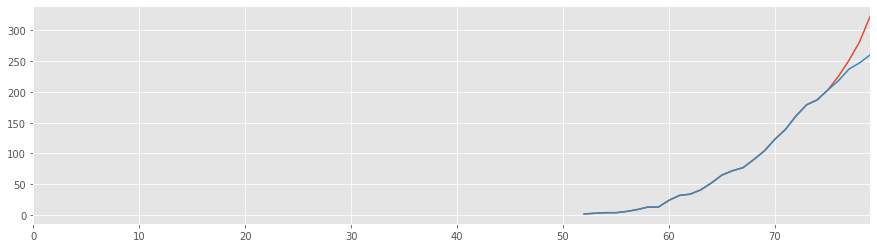

In [816]:
# Plot of predicted vs actual values for country. - red = pred
Prediction['Denmark'].plot(kind='line')
Actual_values['Denmark'].plot(kind='line')
plt.show()

In [785]:
#Ridge
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
y_pred2 = reg.predict(X_test)
#calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred2))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred2))
print()

Mean Squared Error:  18688.80919781068
Mean Absolute Error:  38.842668734608324



In [787]:
#Lasso
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
y_pred2 = reg.predict(X_test)
#calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred2))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred2))
print()

Mean Squared Error:  18460.057452243964
Mean Absolute Error:  37.87566374757357



In [800]:
#polytransforming data
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_train1= poly.fit_transform(X_train)
X_test1=poly.transform(X_test)

In [802]:
#LassoLars - best estimator
reg = linear_model.LassoLars(alpha=0.1)
reg.fit(X_train1, y_train)
y_pred1 = reg.predict(X_test1)
#calculating errors
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred2))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred2))
print()

#cross validating 
kf = KFold(n_splits=10) #10 fold cross validation
y_pred_c1 = cross_val_predict(reg, X_test1, y_test, cv=kf)
print('Cross validated Mean Squared Error: ',mean_squared_error(y_test, y_pred_c1))
print('Cross validated Mean Absolute Error: ',mean_absolute_error(y_test, y_pred_c1))


Mean Squared Error:  16813.11380853454
Mean Absolute Error:  33.99945356537656

Cross validated Mean Squared Error:  46378.334734104545
Cross validated Mean Absolute Error:  49.18795439677559
